## **DIFFERENT TYPES OF REGRESSIONS WITH CARET R**

**Airline Delays Data**
 
* Flight = the origin-destination pair (LAX-ORD, ATL-LAX, etc.)
* Carrier = the carrier operating the flight (American Airlines, Delta Air Lines, etc.)
* Month = the month of the flight (June, July, or August)
* DayOfWeek = the day of the week of the flight (Monday, Tuesday, etc.)
* NumPrevFlights = the number of previous flights taken by this aircraft in the same day
* PrevFlightGap = the amount of time between when this flight’s aircraft is scheduled to arrive at the airport and when it’s scheduled to depart for this flight
* HistoricallyLate = the proportion of time this flight has been late historically
* InsufficientHistory = whether or not we have enough data to determine the historical record of the flight (equal to 1 if we don’t have at least 3 records, equal to 0 if we do)
* OriginInVolume = the amount of incoming traffic volume at the origin airport, normalized by the typical volume during the flight’s time and day of the week
* OriginOutVolume = the amount of outgoing traffic volume at the origin airport, normalized by the typical volume during the flight’s time and day of the week
* DestInVolume = the amount of incoming traffic volume at the destination airport, normalized by the typical volume during the flight’s time and day of the week
* DestOutVolume = the amount of outgoing traffic volume at the destination airport, normalized by the typical volume during the flight’s time and day of the week
* OriginPrecip = the amount of rain at the origin over the course of the day, in tenths of millimeters
* OriginAvgWind = average daily wind speed at the origin, in miles per hour
* OriginWindGust = fastest wind speed during the day at the origin, in miles per hour
* OriginFog = whether or not there was fog at some point during the day at the origin (1 if there was, 0 if there wasn’t)
* OriginThunder = whether or not there was thunder at some point during the day at the origin (1 if there was, 0 if there wasn’t)
* DestPrecip = the amount of rain at the destination over the course of the day, in tenths of millimeters
* DestAvgWind = average daily wind speed at the destination, in miles per hour
* DestWindGust = fastest wind speed during the day at the destination, in miles per hour
* DestFog = whether or not there was fog at some point during the day at the destination (1 if there was, 0 if there wasn’t)
* DestThunder = whether or not there was thunder at some point during the day at the destination (1 if there was, 0 if there wasn’t)
* TotalDelay = the amount of time the aircraft was delayed, in minutes (this is our dependent variable)

In [1]:
library(tidyverse)
library(MASS)
library(caret)

### Loading and preparing data
Airlines <- read.csv("data/AirlineDelay.csv")

# split between training and testing sets
spl = createDataPartition(Airlines$TotalDelay, p = 0.8, list = FALSE)  # 80% for training

AirlinesTrain = Airlines[spl,]
AirlinesTest = Airlines[-spl,]

str(AirlinesTrain)
str(AirlinesTest)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



'data.frame':	7506 obs. of  23 variables:
 $ Flight             : Factor w/ 6 levels "ATL-LAX","ATL-ORD",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Carrier            : Factor w/ 8 levels "AirTran Airways",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Month              : Factor w/ 3 levels "August","July",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ DayOfWeek          : Factor w/ 7 levels "Friday","Monday",..: 7 4 2 6 7 5 1 4 6 7 ...
 $ NumPrevFlights     : int  1 1 1 1 1 2 1 1 1 1 ...
 $ PrevFlightGap      : int  55 30 55 55 55 55 55 55 55 55 ...
 $ HistoricallyLate   : num  0 0.25 0.2 0.167 0.286 ...
 $ InsufficientHistory: int  1 0 0 0 0 0 0 0 0 0 ...
 $ OriginInVolume     : num  1.05 1.09 1.04 1.03 1.05 ...
 $ OriginOutVolume    : num  1.027 1.002 0.995 1.015 1.004 ...
 $ DestInVolume       : num  0.99 0.97 0.988 0.987 0.99 ...
 $ DestOutVolume      : num  0.987 1.036 0.986 1.001 0.987 ...
 $ OriginPrecip       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ OriginAvgWind      : num  9.62 7.61 8.95 7.38 7.16 ...
 $ OriginWindGust     

In [2]:
names(AirlinesTrain)
dim(AirlinesTrain)
summary(AirlinesTrain)

[1] "Flight"              "Carrier"             "Month"              
 [4] "DayOfWeek"           "NumPrevFlights"      "PrevFlightGap"      
 [7] "HistoricallyLate"    "InsufficientHistory" "OriginInVolume"     
[10] "OriginOutVolume"     "DestInVolume"        "DestOutVolume"      
[13] "OriginPrecip"        "OriginAvgWind"       "OriginWindGust"     
[16] "OriginFog"           "OriginThunder"       "DestPrecip"         
[19] "DestAvgWind"         "DestWindGust"        "DestFog"            
[22] "DestThunder"         "TotalDelay"

[1] 7506   23

     Flight                   Carrier        Month          DayOfWeek   
 ATL-LAX:1173   Delta Air Lines   :3184   August:2517   Friday   :1070  
 ATL-ORD: 893   United Airlines   :1680   July  :2554   Monday   :1091  
 LAX-ATL:1172   American Airlines :1430   June  :2435   Saturday : 938  
 LAX-ORD:1739   Southwest Airlines: 481                 Sunday   :1141  
 ORD-ATL: 886   Virgin America    : 284                 Thursday :1105  
 ORD-LAX:1643   SkyWest Airlines  : 200                 Tuesday  :1082  
                (Other)           : 247                 Wednesday:1079  
 NumPrevFlights  PrevFlightGap   HistoricallyLate InsufficientHistory
 Min.   :0.000   Min.   :  1.0   Min.   :0.0000   Min.   :0.0000     
 1st Qu.:0.000   1st Qu.: 52.0   1st Qu.:0.0000   1st Qu.:0.0000     
 Median :1.000   Median : 62.0   Median :0.1379   Median :0.0000     
 Mean   :1.643   Mean   :115.5   Mean   :0.1903   Mean   :0.2738     
 3rd Qu.:3.000   3rd Qu.:240.0   3rd Qu.:0.3000   3rd Qu.:1.0000  

# Main objective: predict TotalDelay as a function of the other variables

### Introduction

Most of the flights have a delay less than 1 min (Q1=0, Q2=1, Q3=18)

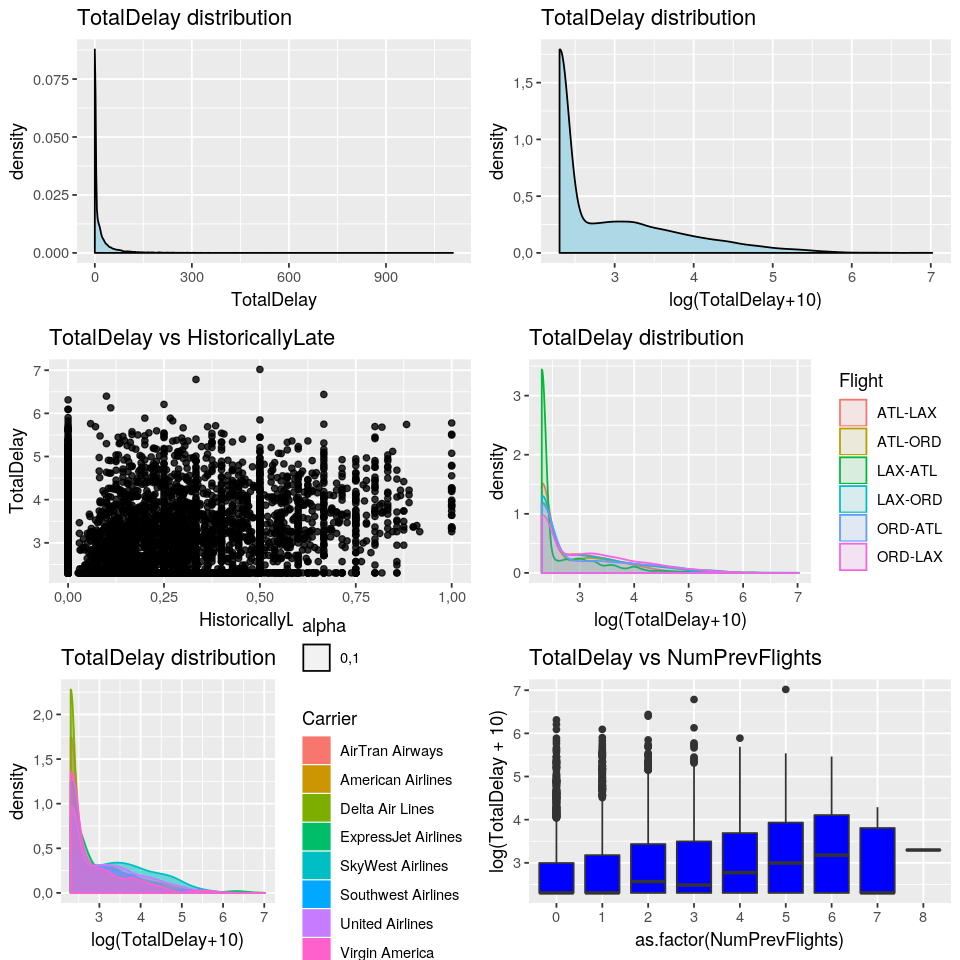

In [3]:
options(repr.plot.width=8, repr.plot.height= 8)
d1 <- ggplot(AirlinesTrain, aes(TotalDelay)) + geom_density(fill="lightblue") + 
  xlab("TotalDelay") +
  ggtitle("TotalDelay distribution")
# most of the flights have a delay less than 1 min (Q1=0, Q2=1, Q3=18)

d2 <- ggplot(AirlinesTrain, aes(log(TotalDelay+10))) + geom_density(fill="lightblue") + 
  xlab("log(TotalDelay+10)") +
  ggtitle("TotalDelay distribution")

# seems roughly two groups: one with delays less than 7 min (approx) and the other greater (approx)
# or a second group with center (mode) at 10 min

# Moreover, half of the observations have a TotalDelay==0
# Should we omit those observations?
# AirlinesTrain = filter(AirlinesTrain, TotalDelay>0)
# AirlinesTest = filter(AirlinesTest, TotalDelay>0)

# TotalDelay vs HistoricallyLate
d3 <- ggplot(AirlinesTrain, aes(x=HistoricallyLate, y=log(TotalDelay+10))) +
  ylab("TotalDelay") + 
  geom_point(alpha=0.8) +
  ggtitle("TotalDelay vs HistoricallyLate")
# maybe some non-linearities?

d4 <- ggplot(AirlinesTrain, aes(log(TotalDelay+10))) + geom_density(aes(group=Flight, colour=Flight, fill=Flight), alpha=0.1) + 
  xlab("log(TotalDelay+10)") +
  ggtitle("TotalDelay distribution")
# Not so many differences in the 6 flights, but LAX-ATL has less delays

d5 <- ggplot(AirlinesTrain, aes(log(TotalDelay+10))) + geom_density(aes(group=Carrier, colour=Carrier, fill=Carrier, alpha=0.1)) + 
  xlab("log(TotalDelay+10)") +
  ggtitle("TotalDelay distribution")
# SkyWest Airlines seems to have more delays

d6 <- ggplot(AirlinesTrain, aes(x=as.factor(NumPrevFlights), y=log(TotalDelay+10))) +
  geom_boxplot(fill="blue") +
  ggtitle("TotalDelay vs NumPrevFlights")
# number of previous flights seems to increase delay, in a monotic but non-linear way


gridExtra::grid.arrange(d1, d2, d3, d4, d5, d6, ncol= 2)  

In [4]:
### ¿Eliminate those with zeros? NO. We ruin the prediction of the 2nd day...and this are more than 50%

## **FEATURE PLOTS**

* Multiple scatter plots.
* More examples in: https://topepo.github.io/caret/visualizations.html

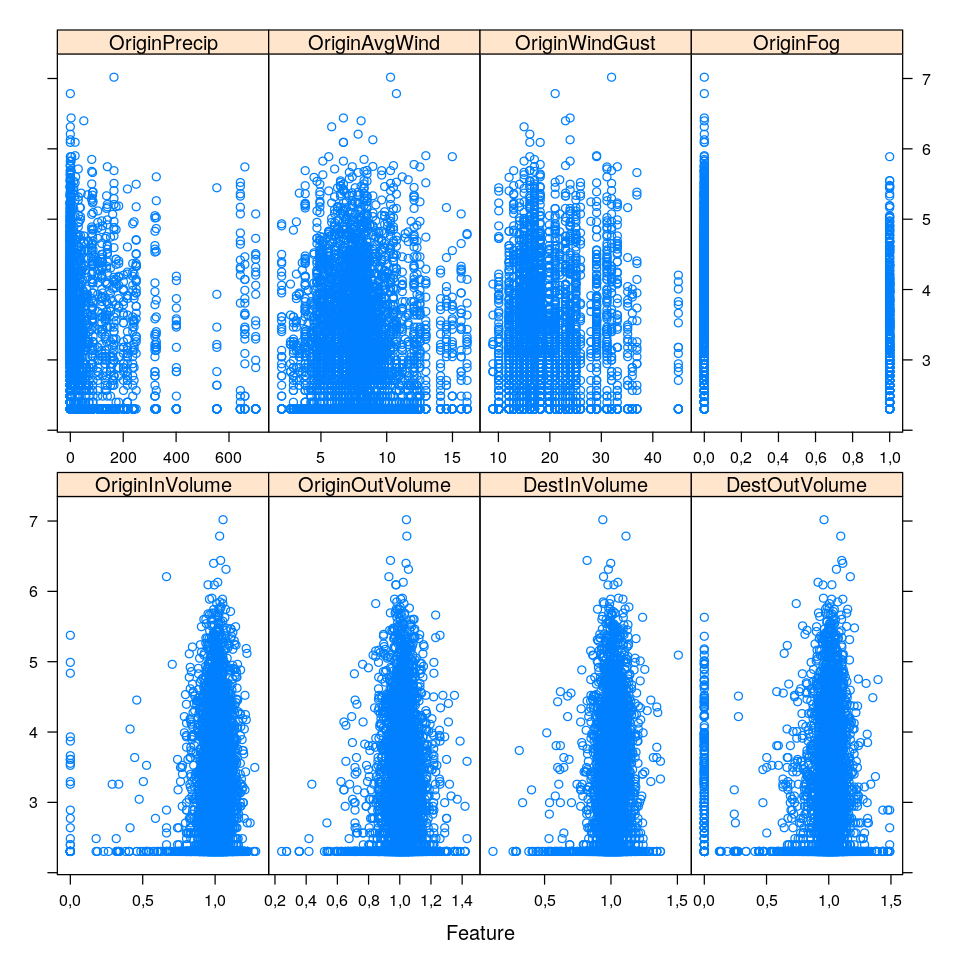

In [5]:
featurePlot(x = AirlinesTrain[, c(9:16)],
            y = log(AirlinesTrain$TotalDelay+10),
            plot = "scatter",
            #type = c("p", "smooth"),
            layout = c(4, 2))

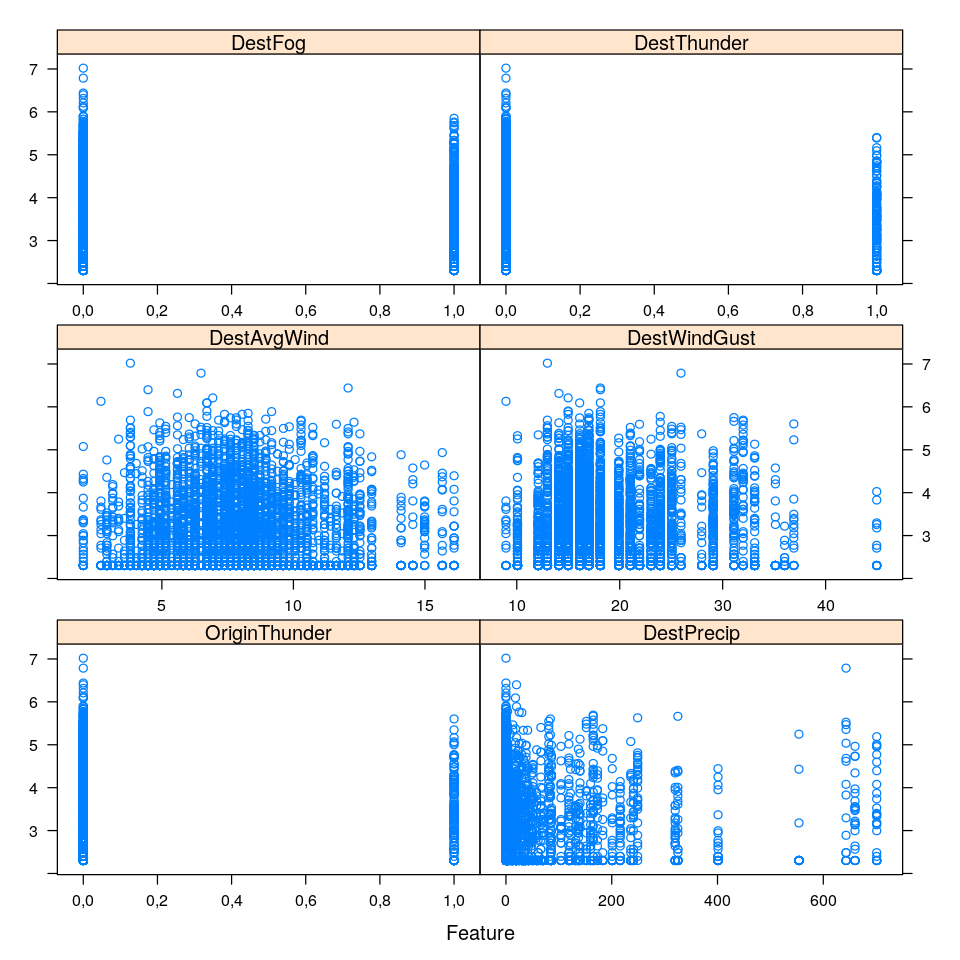

In [6]:
featurePlot(x = AirlinesTrain[, c(17:22)],
            y = log(AirlinesTrain$TotalDelay+10),
            plot = "scatter",
            #type = c("p", "smooth"),
            #span = .5,
            layout = c(2, 3))

## **Feature Engineering**

# A basic multiple regression model with interactions:

In [7]:
linFit <- lm(log(TotalDelay+10) ~ OriginAvgWind + OriginPrecip + DestAvgWind + DestPrecip + HistoricallyLate +
               OriginPrecip:DestPrecip, data=AirlinesTrain)
# The syntax x1:x2 tells R to include an interaction term between x1 and x2 
# The syntax x1*x2 simultaneously includes x1, x2, and the interaction term x1:x2 as predictors; 
#   it is a shorthand for x1+x2+x1:x2

In [8]:
summary(linFit)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = log(TotalDelay + 10) ~ OriginAvgWind + OriginPrecip + 
    DestAvgWind + DestPrecip + HistoricallyLate + OriginPrecip:DestPrecip, 
    data = AirlinesTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-1,6918 -0,4976 -0,3157  0,3845  3,7446 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              2,359e+00  4,641e-02  50,835  < 2e-16 ***
OriginAvgWind            2,273e-02  3,812e-03   5,964 2,57e-09 ***
OriginPrecip             1,148e-03  9,998e-05  11,480  < 2e-16 ***
DestAvgWind              1,390e-02  3,822e-03   3,637 0,000278 ***
DestPrecip               1,005e-03  1,036e-04   9,706  < 2e-16 ***
HistoricallyLate         9,747e-01  4,184e-02  23,295  < 2e-16 ***
OriginPrecip:DestPrecip -2,388e-06  1,115e-06  -2,142 0,032212 *  
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 0,7552 on 7499 degrees of freedom
Multiple R-squared:  0,09643,	Adjusted R-squared:  

### R2 is roughly 10% (for the log delay), the variables are significant

# Diagnosis

 * the plot.lm() function can return 6 graphs:
 * [1] a plot of residuals against fitted values, 
 * [2] a Scale-Location plot of sqrt(| residuals |) against fitted values, 
 * [3] a Normal Q-Q plot, 
 * [4] a plot of Cook's distances versus row labels, 
 * [5] a plot of residuals against leverages, and 
 * [6] a plot of Cook's distances against leverage/(1-leverage). 

Plots [1], [2], [3] & [5] are returned by default.

## some non-linear residuals: more feature engineering needed

Then, numbers in the graphs are outliers.

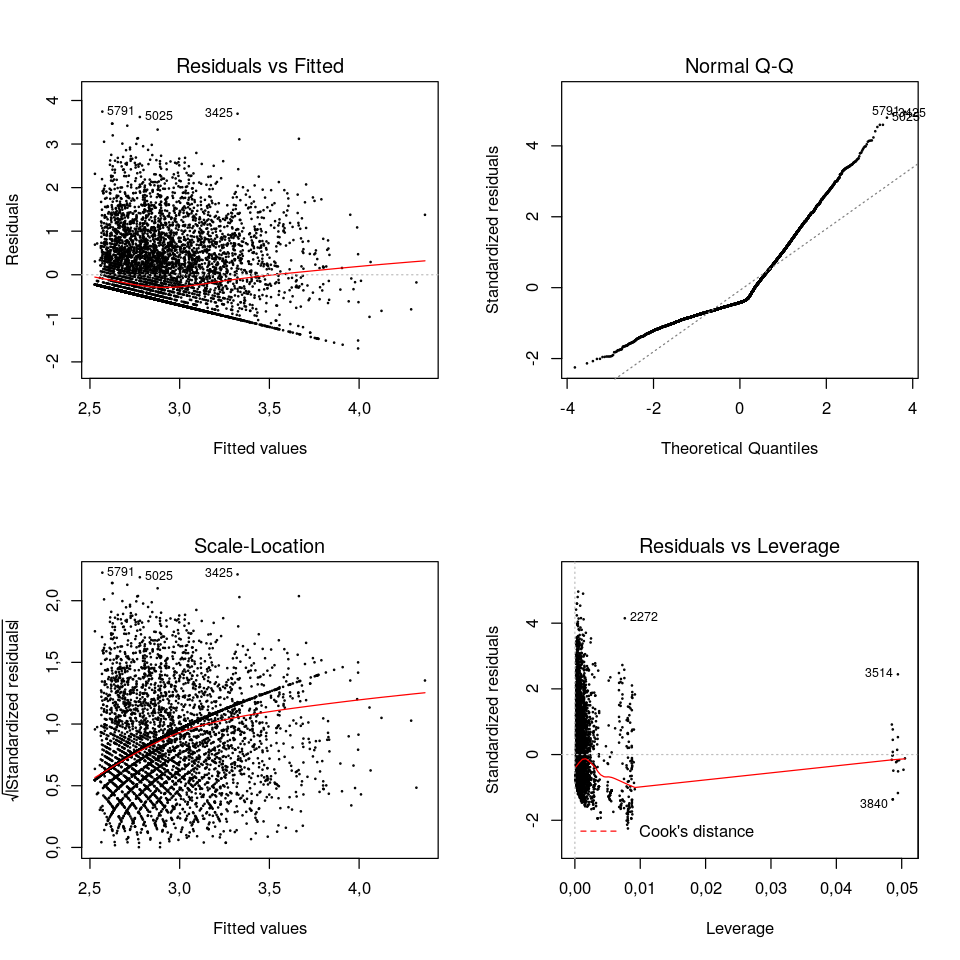

In [9]:
par(mfrow=c(2,2))
plot(linFit, cex=.2)

## OUTLIERS
* This are the numbers on the graphics above.
* SOme of them distort a lot the regression
* Eliminate them or use a robust regression (that give less weight to the outliers)
* https://learnche.org/pid/least-squares-modelling/outliers-discrepancy-leverage-and-influence-of-the-observations

### Influential Measures
We have seen so far how to detect potential problems with model building. We will focus
now on detecting potential observations that have significant impact on our model. There
are several reasons that we need to detect influential observations. First, there are possibly
data entry errors. Secondly influential observations may be of interest by themselves for us
to study. After all, influential data points may badly skew our regression estimation.

**More in:**

* https://web.stanford.edu/class/stats191/notebooks/Diagnostics_for_multiple_regression.html
* **BOOK:** http://halweb.uc3m.es/esp/Personal/personas/durban/esp/web/notes/courseRmanual.pdf
* https://en.wikipedia.org/wiki/Influential_observation
* https://www.kdnuggets.com/2018/08/make-machine-learning-models-robust-outliers.html
* https://github.com/aswalin/Outlier-Impact-Treatment
* **GOOD RESOURCES** http://www.columbia.edu/~so33/SusDev/Lecture_5.pdf

## Influence of an observation

Idea: if  Yˆj(i)  is very different than  Yˆj  (using all the data) then  i  is an influential point, at least for estimating the regression function at  (X1,j,…,Xp,j) .

Could also look at difference between  Yˆi(i)−Yˆi , or any other measure.

There are various standard measures of influence.

Which observations 'are' **influential** in any measure

In [10]:
# Leverage or influence points
inflm = influence.measures(linFit)
#inflm

In [11]:
head(which(apply(inflm$is.inf, 1, any)))

19  54  78  97 108 132 
 15  44  63  75  84 101

In [12]:
# which observations 'are' influential in any measure
summary(inflm) # only these

Potentially influential observations of
	 lm(formula = log(TotalDelay + 10) ~ OriginAvgWind + OriginPrecip +      DestAvgWind + DestPrecip + HistoricallyLate + OriginPrecip:DestPrecip,      data = AirlinesTrain) :

     dfb.1_ dfb.OrAW dfb.OrgP dfb.DsAW dfb.DstP dfb.HstL dfb.OP:D dffit  
19    0,01   0,00     0,00    -0,01    -0,02     0,00     0,00    -0,02  
54    0,00   0,00     0,00     0,00    -0,03     0,00     0,01    -0,03  
78    0,00   0,00     0,00     0,00     0,01     0,00     0,00     0,01  
97    0,01  -0,01    -0,03     0,00     0,00     0,00     0,01    -0,03  
108   0,01  -0,02    -0,01     0,02    -0,01     0,00     0,00     0,05  
132   0,01   0,00    -0,07     0,00     0,00     0,00     0,02    -0,07  
199   0,04  -0,05    -0,15    -0,01    -0,01     0,01     0,05    -0,16_*
221  -0,01   0,02     0,00     0,01     0,00     0,00     0,00     0,02  
230   0,02  -0,01     0,00    -0,01    -0,01     0,00     0,00     0,03  
233   0,01  -0,01    -0,16    -0,01    -0,01 

In [13]:
# From these plots, we can identify some observations possibly problematic: 
AirlinesTrain[c(5025, 5791, 2272, 3425, 3748, 4984), ]

,Flight,Carrier,Month,DayOfWeek,NumPrevFlights,PrevFlightGap,HistoricallyLate,InsufficientHistory,OriginInVolume,OriginOutVolume,⋯,OriginAvgWind,OriginWindGust,OriginFog,OriginThunder,DestPrecip,DestAvgWind,DestWindGust,DestFog,DestThunder,TotalDelay
6260,ORD-ATL,SkyWest Airlines,June,Monday,0,240,"0,6875000",0,"1,1214058","1,0145191",⋯,"12,526864","31,09347",0,0,241,"3,131716","29,08022",0,0,35
7247,LAX-ORD,United Airlines,July,Thursday,1,65,"0,0000000",1,"1,0488323","0,9774436",⋯,"9,395148","19,90877",0,0,0,"4,473880","14,09272",0,0,0
2865,ATL-ORD,Delta Air Lines,August,Sunday,3,40,"0,0000000",1,"1,0237660","0,7974684",⋯,"10,513618","23,04048",0,0,0,"7,381902","12,07948",0,0,0
4304,ATL-ORD,Delta Air Lines,August,Saturday,0,240,"0,0000000",1,"0,9517471","0,9925769",⋯,"8,276678","21,02724",0,1,86,"4,921268","29,08022",0,0,0
4700,ORD-ATL,Delta Air Lines,June,Tuesday,1,7,"0,0000000",1,"0,9891304","0,8772259",⋯,"9,842536","23,04048",0,0,0,"4,473880","10,06623",0,0,12
6209,ATL-ORD,SkyWest Airlines,July,Friday,4,35,"0,2727273",0,"1,0963855","1,0270880",⋯,"4,697574","12,07948",1,0,0,"6,934514","18,11921",0,0,4


In [14]:
# If an observation is an outlier (high residual) and influential (high leverage) then that observation 
# can change the fit of the linear model, it is advisable to remove it
# To remove a case(s) type
linFit = update(linFit, subset=-c(5025, 5791, 2272, 3425, 3748, 4984))

# **Feature Engineering: dummies, non-linearities and interactions**

Now we are going to incorporate high-order and other interaction terms in the linear approximation

There are many categorical variables. For instance, Flight has 6 categories but R creates 5 dummies, why?

Non-linearities: two choices
For instance, we can use 
1.  `AirlinesTrain$HistoricallyLate2 = AirlinesTrain$HistoricallyLate^2` as a new variable or
2.  `I(HistoricallyLate^2) inside lm()`

Useful to incorporate interactions between categorical variables and numeric ones

In [15]:
# Useful to incorporate interactions between categorical variables and numeric ones

linFit <- lm(log(TotalDelay+10) ~ Flight*(OriginAvgWind+OriginPrecip+DestAvgWind+DestPrecip+OriginWindGust+HistoricallyLate)+I(HistoricallyLate^2)+OriginPrecip:DestPrecip, data=AirlinesTrain)
summary(linFit)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = log(TotalDelay + 10) ~ Flight * (OriginAvgWind + 
    OriginPrecip + DestAvgWind + DestPrecip + OriginWindGust + 
    HistoricallyLate) + I(HistoricallyLate^2) + OriginPrecip:DestPrecip, 
    data = AirlinesTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-2,4734 -0,4912 -0,2393  0,3685  3,8155 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     2,178e+00  1,815e-01  11,995  < 2e-16 ***
FlightATL-ORD                  -1,305e-01  2,223e-01  -0,587 0,557255    
FlightLAX-ATL                   4,724e-01  2,722e-01   1,736 0,082663 .  
FlightLAX-ORD                   1,053e+00  2,425e-01   4,342 1,43e-05 ***
FlightORD-ATL                  -1,551e-02  2,204e-01  -0,070 0,943912    
FlightORD-LAX                   3,949e-01  2,381e-01   1,659 0,097153 .  
OriginAvgWind                   6,258e-03  1,044e-02   0,599 0,548981    
OriginPrecip                    1,343e-03  2,449e-04   5,484 4,28

In [16]:
# But how to select a convenient model with interactions and high-order terms?
# This is a difficult task... Alternatives?

# Choose any of the next models (or any other):
model = log(TotalDelay+10) ~ Flight*(OriginAvgWind+OriginPrecip+DestAvgWind+DestPrecip+OriginWindGust+HistoricallyLate)+I(HistoricallyLate^2)+OriginPrecip:DestPrecip
model = log(TotalDelay+10) ~ .


### **Robust Regression with different loss functions**

In [17]:
linfit.huber <- rlm(model, data=AirlinesTrain)
summary(linfit.huber)


Call: rlm(formula = model, data = AirlinesTrain)
Residuals:
    Min      1Q  Median      3Q     Max 
-1,5666 -0,3917 -0,1202  0,4547  3,7912 

Coefficients:
                           Value   Std. Error t value
(Intercept)                 1,2903  0,1460     8,8362
FlightATL-ORD              -0,0412  0,0313    -1,3183
FlightLAX-ATL              -0,0412  0,0283    -1,4540
FlightLAX-ORD              -0,1553  0,1855    -0,8372
FlightORD-ATL              -0,0457  0,0327    -1,3964
FlightORD-LAX              -0,0631  0,1855    -0,3401
CarrierAmerican Airlines    0,1249  0,1912     0,6532
CarrierDelta Air Lines      0,0027  0,0498     0,0536
CarrierExpressJet Airlines  0,0449  0,0939     0,4784
CarrierSkyWest Airlines     0,2274  0,0698     3,2594
CarrierSouthwest Airlines  -0,0222  0,0557    -0,3984
CarrierUnited Airlines      0,2600  0,1901     1,3676
CarrierVirgin America       0,1087  0,1940     0,5601
MonthJuly                  -0,0928  0,0185    -5,0060
MonthJune                  -0,00

In [18]:
linfit.bisquare <- rlm(model, data=AirlinesTrain, psi = psi.bisquare)
summary(linfit.bisquare)


Call: rlm(formula = model, data = AirlinesTrain, psi = psi.bisquare)
Residuals:
     Min       1Q   Median       3Q      Max 
-1,52792 -0,36171 -0,09461  0,48391  3,82986 

Coefficients:
                           Value   Std. Error t value
(Intercept)                 1,3215  0,1461     9,0421
FlightATL-ORD              -0,0627  0,0313    -2,0045
FlightLAX-ATL              -0,0543  0,0283    -1,9175
FlightLAX-ORD              -0,1722  0,1857    -0,9271
FlightORD-ATL              -0,0757  0,0327    -2,3110
FlightORD-LAX              -0,0836  0,1856    -0,4501
CarrierAmerican Airlines    0,1368  0,1913     0,7149
CarrierDelta Air Lines      0,0061  0,0499     0,1220
CarrierExpressJet Airlines  0,0435  0,0939     0,4631
CarrierSkyWest Airlines     0,2611  0,0698     3,7386
CarrierSouthwest Airlines  -0,0299  0,0557    -0,5368
CarrierUnited Airlines      0,2667  0,1902     1,4019
CarrierVirgin America       0,1165  0,1942     0,5996
MonthJuly                  -0,0806  0,0185    -4,3437
Mo

## **Predictions**

In [19]:
prLM <- predict(linFit, newdata=AirlinesTest)
cor(log(AirlinesTest$TotalDelay+10), prLM)^2 #aprox equal to R-squared
mean(abs(log(AirlinesTest$TotalDelay+10)- prLM)/log(AirlinesTest$TotalDelay+10))

prHuber <- predict(linfit.huber, newdata=AirlinesTest)
cor(log(AirlinesTest$TotalDelay+10), prHuber)^2 #aprox equal to R-squared
mean(abs(log(AirlinesTest$TotalDelay+10)- prHuber)/log(AirlinesTest$TotalDelay+10))

prBi <- predict(linfit.bisquare, newdata=AirlinesTest)
cor(log(AirlinesTest$TotalDelay+10), prBi)^2 #aprox equal to R-squared
mean(abs(log(AirlinesTest$TotalDelay+10)- prBi)/log(AirlinesTest$TotalDelay+10))


[1] 0,1302717

[1] 0,1915206

[1] 0,1805638

[1] 0,1731114

[1] 0,1790039

[1] 0,1690729

* When comparing the results of OLS regression with robust regression, if the results are very different, better to use the results from the robust regression: more reliable
* Large differences suggest that the model parameters are being highly influenced by outliers. 
* Different loss functions have advantages and drawbacks. Huber weights can have difficulties with severe outliers, and bisquare weights can have difficulties converging or may yield multiple solutions

In [20]:
# Complete multiple regression:
linFit <- lm(log(TotalDelay+10) ~ ., data=AirlinesTrain)
summary(linFit)
# R2 is roughly 20%, but many variables non-significant

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = log(TotalDelay + 10) ~ ., data = AirlinesTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-1,6891 -0,4830 -0,1914  0,3645  3,6931 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1,197e+00  1,674e-01   7,153 9,30e-13 ***
FlightATL-ORD               1,090e-02  3,585e-02   0,304 0,761193    
FlightLAX-ATL              -1,559e-02  3,246e-02  -0,480 0,630942    
FlightLAX-ORD              -1,113e-01  2,127e-01  -0,523 0,600774    
FlightORD-ATL               2,764e-02  3,751e-02   0,737 0,461131    
FlightORD-LAX              -2,061e-02  2,126e-01  -0,097 0,922772    
CarrierAmerican Airlines    1,162e-01  2,191e-01   0,530 0,595962    
CarrierDelta Air Lines     -7,479e-03  5,711e-02  -0,131 0,895814    
CarrierExpressJet Airlines  4,064e-02  1,076e-01   0,378 0,705658    
CarrierSkyWest Airlines     1,790e-01  7,998e-02   2,238 0,025252 *  
CarrierSouthwest Airlines  -1,278e-02  6,381e-02  -0,

In [21]:
# Predictions
prLM <- predict(linFit, newdata=AirlinesTest)
cor(log(AirlinesTest$TotalDelay+10), prLM)^2
mean(abs(log(AirlinesTest$TotalDelay+10)- prLM)/log(AirlinesTest$TotalDelay+10))
# high overfitting, but predictions not too bad... why?

[1] 0,1806128

[1] 0,1868039

### **Advanced Regression Models**

Now try many advanced tools with **caret**
 
Caret package highly recommended:
* to evaluate performance abd calibrate sensitive parameters
* to choose the best model across these parameters
* to estimate model performance from a training set

### Main function: train()

### These are the models for regression and classification:

In [22]:
# These are the models for regression and classification:
names(getModelInfo()) 

[1] "ada"                 "AdaBag"              "AdaBoost.M1"        
  [4] "adaboost"            "amdai"               "ANFIS"              
  [7] "avNNet"              "awnb"                "awtan"              
 [10] "bag"                 "bagEarth"            "bagEarthGCV"        
 [13] "bagFDA"              "bagFDAGCV"           "bam"                
 [16] "bartMachine"         "bayesglm"            "binda"              
 [19] "blackboost"          "blasso"              "blassoAveraged"     
 [22] "bridge"              "brnn"                "BstLm"              
 [25] "bstSm"               "bstTree"             "C5.0"               
 [28] "C5.0Cost"            "C5.0Rules"           "C5.0Tree"           
 [31] "cforest"             "chaid"               "CSimca"             
 [34] "ctree"               "ctree2"              "cubist"             
 [37] "dda"                 "deepboost"           "DENFIS"             
 [40] "dnn"                 "dwdLinear"           "dwdPoly"            
 [43] "dwdRadial"           "earth"               "elm"                
 [46] "enet"                "evtree"              "extraTrees"         
 [49] "fda"                 "FH.GBML"             "FIR.DM"             
 [52] "foba"                "FRBCS.CHI"           "FRBCS.W"            
 [55] "FS.HGD"              "gam"                 "gamboost"           
 [58] "gamLoess"            "gamSpline"           "gaussprLinear"      
 [61] "gaussprPoly"         "gaussprRadial"       "gbm_h2o"            
 [64] "gbm"                 "gcvEarth"            "GFS.FR.MOGUL"       
 [67] "GFS.LT.RS"           "GFS.THRIFT"          "glm.nb"             
 [70] "glm"                 "glmboost"            "glmnet_h2o"         
 [73] "glmnet"              "glmStepAIC"          "gpls"               
 [76] "hda"                 "hdda"                "hdrda"              
 [79] "HYFIS"               "icr"                 "J48"                
 [82] "JRip"                "kernelpls"           "kknn"               
 [85] "knn"                 "krlsPoly"            "krlsRadial"         
 [88] "lars"                "lars2"               "lasso"              
 [91] "lda"                 "lda2"                "leapBackward"       
 [94] "leapForward"         "leapSeq"             "Linda"              
 [97] "lm"                  "lmStepAIC"           "LMT"                
[100] "loclda"              "logicBag"            "LogitBoost"         
[103] "logreg"              "lssvmLinear"         "lssvmPoly"          
[106] "lssvmRadial"         "lvq"                 "M5"                 
[109] "M5Rules"             "manb"                "mda"                
[112] "Mlda"                "mlp"                 "mlpKerasDecay"      
[115] "mlpKerasDecayCost"   "mlpKerasDropout"     "mlpKerasDropoutCost"
[118] "mlpML"               "mlpSGD"              "mlpWeightDecay"     
[121] "mlpWeightDecayML"    "monmlp"              "msaenet"            
[124] "multinom"            "mxnet"               "mxnetAdam"          
[127] "naive_bayes"         "nb"                  "nbDiscrete"         
[130] "nbSearch"            "neuralnet"           "nnet"               
[133] "nnls"                "nodeHarvest"         "null"               
[136] "OneR"                "ordinalNet"          "ORFlog"             
[139] "ORFpls"              "ORFridge"            "ORFsvm"             
[142] "ownn"                "pam"                 "parRF"              
[145] "PART"                "partDSA"             "pcaNNet"            
[148] "pcr"                 "pda"                 "pda2"               
[151] "penalized"           "PenalizedLDA"        "plr"                
[154] "pls"                 "plsRglm"             "polr"               
[157] "ppr"                 "PRIM"                "protoclass"         
[160] "qda"                 "QdaCov"              "qrf"                
[163] "qrnn"                "randomGLM"           "ranger"             
[166] "rbf"                 "rbfDDA"      

## **CV**

In [23]:
# Each model can be automatically tuned and evaluated 
# In this case, we are goint to use 5 repeats of 10-fold cross validation
ctrl <- trainControl(method = "repeatedcv", 
                     repeats = 5,
                     number = 10)
# we can also choose bootstrap, LOOCV, etc.

In [24]:
test_results <- data.frame(TotalDelay = log(AirlinesTest$TotalDelay+10))
observed = log(AirlinesTest$TotalDelay+10)

RMSE  Rsquared       MAE 
0,7141033 0,1806128 0,5551671

Warning message:
“Removed 2 rows containing missing values (geom_point).”

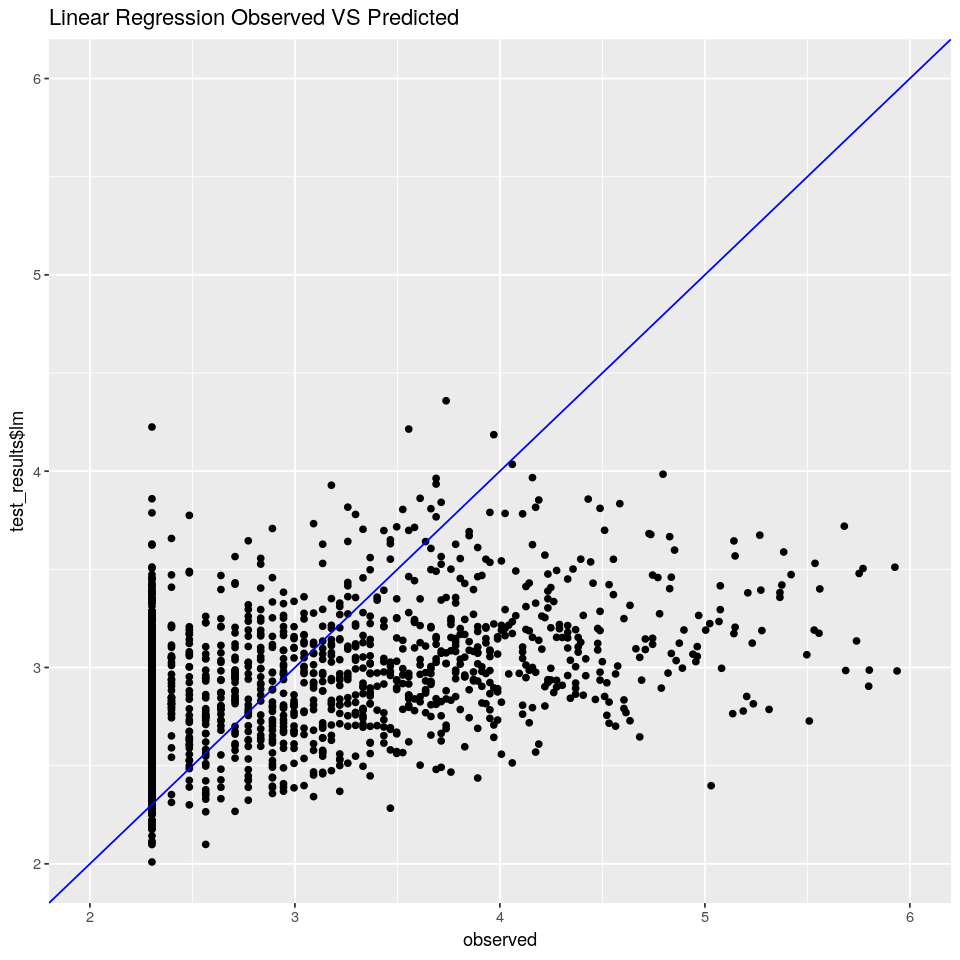

In [25]:
# Linear regression
lm_tune <- train(log(TotalDelay+10) ~ ., data = AirlinesTrain, 
                 method = "lm", 
                 preProc=c('scale', 'center'),
                 trControl = ctrl)
test_results$lm <- predict(lm_tune, AirlinesTest)
postResample(pred = test_results$lm,  obs = observed)
qplot(observed, test_results$lm) +
  lims(x = c(2, 6), y = c(2, 6)) +
  geom_abline(intercept = 0, slope = 1, colour = "blue") +
  ggtitle("Linear Regression Observed VS Predicted")

In [26]:
# Robust regression
rlm_tune <- train(log(TotalDelay+10) ~ ., data = AirlinesTrain, 
                 method = "rlm", 
                 preProc=c('scale', 'center'),
                 trControl = ctrl)

Warning message:
“model fit failed for Fold01.Rep1: intercept= TRUE, psi=psi.huber Error in `[.data.frame`(mf, xvars) : undefined columns selected
”Warning message:
“model fit failed for Fold01.Rep1: intercept=FALSE, psi=psi.huber Error in `[.data.frame`(mf, xvars) : undefined columns selected
”Warning message:
“model fit failed for Fold01.Rep1: intercept= TRUE, psi=psi.hampel Error in `[.data.frame`(mf, xvars) : undefined columns selected
”Warning message:
“model fit failed for Fold01.Rep1: intercept=FALSE, psi=psi.hampel Error in `[.data.frame`(mf, xvars) : undefined columns selected
”Warning message:
“model fit failed for Fold01.Rep1: intercept= TRUE, psi=psi.bisquare Error in `[.data.frame`(mf, xvars) : undefined columns selected
”Warning message:
“model fit failed for Fold01.Rep1: intercept=FALSE, psi=psi.bisquare Error in `[.data.frame`(mf, xvars) : undefined columns selected
”Warning message:
“model fit failed for Fold02.Rep1: intercept= TRUE, psi=psi.huber Error in `[.data.fram

Something is wrong; all the RMSE metric values are missing:
      RMSE        Rsquared        MAE     
 Min.   : NA   Min.   : NA   Min.   : NA  
 1st Qu.: NA   1st Qu.: NA   1st Qu.: NA  
 Median : NA   Median : NA   Median : NA  
 Mean   :NaN   Mean   :NaN   Mean   :NaN  
 3rd Qu.: NA   3rd Qu.: NA   3rd Qu.: NA  
 Max.   : NA   Max.   : NA   Max.   : NA  
 NA's   :6     NA's   :6     NA's   :6    


ERROR: Error: Stopping


In [ ]:
# numerically unstable...
#rlm_tune
test_results$rlm <- predict(rlm_tune, AirlinesTest)
postResample(pred = test_results$rlm,  obs = observed)
qplot(observed, test_results$lrm) +
  lims(x = c(2, 6), y = c(2, 6)) +
  geom_abline(intercept = 0, slope = 1, colour = "blue") +
  ggtitle("Robust Regression Observed VS Predicted")

In [ ]:
# Forward regression: in his case this does not work well
for_tune <- train(log(TotalDelay+10) ~ ., data = AirlinesTrain,
                  method = "leapForward", 
                  preProc=c('scale', 'center'),
                  tuneGrid = expand.grid(nvmax = 15:25), #take in consideration 15:25 variables
                  trControl = ctrl)
for_tune
plot(for_tune)

In [ ]:
# which variables are selected?
coef(for_tune$finalModel, for_tune$bestTune$nvmax)
test_results$frw <- predict(for_tune, AirlinesTest)
postResample(pred = test_results$frw,  obs = observed)

In [ ]:
# Backward regression
back_tune <- train(log(TotalDelay+10) ~ ., data = AirlinesTrain,
                  method = "leapBackward", 
                  preProc=c('scale', 'center'),
                  tuneGrid = expand.grid(nvmax = 15:25),
                  trControl = ctrl)

In [ ]:
back_tune
plot(back_tune)
# which variables are selected?
coef(back_tune$finalModel, back_tune$bestTune$nvmax)
test_results$bck <- predict(back_tune, AirlinesTest)
postResample(pred = test_results$bck,  obs = observed)


In [ ]:
#install.packages('leaps')
require(leaps)

In [ ]:
# Stepwise regression
step_tune <- train(log(TotalDelay+10) ~ ., data = AirlinesTrain,
                   method = "leapSeq", 
                   preProc=c('scale', 'center'),
                   tuneGrid = expand.grid(nvmax = 15:25),
                   trControl = ctrl)
step_tune
plot(step_tune)

In [ ]:
# which variables are selected?
coef(step_tune$finalModel, step_tune$bestTune$nvmax)
test_results$step <- predict(step_tune, AirlinesTest)
postResample(pred = test_results$step,  obs = observed)

## **Ridge regression**

In [ ]:
#install.packages('elasticnet')
require(elasticnet)

In [ ]:
ridge_tune <- train(log(TotalDelay+10) ~ ., data = AirlinesTrain,
                   method = "ridge", 
                   preProc=c('scale', 'center'),
                   tuneGrid = expand.grid(lambda = seq(0, .1, length = 10)),
                   trControl = ctrl)
ridge_tune
plot(ridge_tune)
ridge_tune$bestTune
test_results$ridge <- predict(ridge_tune, AirlinesTest)
postResample(pred = test_results$ridge,  obs = observed)

## **Lasso regression**

In [ ]:
lasso_tune <- train(log(TotalDelay+10) ~ ., data = AirlinesTrain,
                    method = "lasso", 
                    preProc=c('scale', 'center'),
                    tuneGrid = expand.grid(fraction = seq(.01, .9, length = 10)),
                    importance = TRUE,
                    trControl = ctrl)
lasso_tune
plot(lasso_tune)
lasso_tune$bestTune
test_results$lasso <- predict(lasso_tune, AirlinesTest)
postResample(pred = test_results$lasso,  obs = observed)

# **Elastic-net regression**

In [ ]:
glmnet_tune <- train(log(TotalDelay+10) ~ ., data = AirlinesTrain,
                     method='glmnet',
                     preProc=c('scale','center'),
                     trControl=ctrl)
plot(glmnet_tune)
glmnet_tune$bestTune
test_results$glmnet <- predict(glmnet_tune, AirlinesTest)
postResample(pred = test_results$glmnet,  obs = observed)

# **PCR**

In [ ]:
pcr_tune <- train(log(TotalDelay+10) ~ ., data = AirlinesTrain,
                     method='pcr',
                     preProc=c('scale','center'),
                     tuneGrid = expand.grid(ncomp = 2:8),
                     trControl=ctrl)
plot(pcr_tune)
pcr_tune$bestTune
test_results$pcr <- predict(pcr_tune, AirlinesTest)
postResample(pred = test_results$pcr,  obs = observed)


# **PLS**

In [ ]:

pls_tune <- train(log(TotalDelay+10) ~ ., data = AirlinesTrain,
                  method='pls',
                  preProc=c('scale','center'),
                  tuneGrid = expand.grid(ncomp = 2:8),
                  trControl=ctrl)
plot(pls_tune)
pls_tune$bestTune
test_results$pls <- predict(pls_tune, AirlinesTest)
postResample(pred = test_results$pls,  obs = observed)


## But how do we know we are doing well?

In [ ]:
# Always consider a benchmark model (or a reference)
# For instance, we can predict all the new delays as the average delay in the training set
mean(observed)
# This is equivalent to
benchFit <- lm(log(TotalDelay+10) ~ 1, data=AirlinesTrain)
predictions <- predict(benchFit, newdata=AirlinesTest)
cor(observed, predictions)^2
RMSE <- sqrt(mean((predictions - observed)^2))
RMSE
MAE <- mean(abs(predictions - observed))
MAE

# Note the benchmark is not so bad....
# This is because this application is quite noisy

# When a prediction error is not enough good for us (like a 15% error), sometimes it is convenient
# to reduce the noise of the response (at the cost of decreasing too the information)

# Let's now divide the Total Delay variable in just three categories:
# No Delay, Minor Delay, Major Delay

## **OTHER PACKAGES**

It is possible for a single observation to have a great influence on the results of a regression analysis. It is therefore important to detect influential observations and to take them into consideration when interpreting the results.

olsrr offers the following tools to detect influential observations:

* Cook’s D Bar Plot
* Cook’s D Chart
* DFBETAs Panel
* DFFITs Plot
* Studentized Residual Plot
* Standardized Residual Chart
* Studentized Residuals vs Leverage Plot
* Deleted Studentized Residual vs Fitted Values Plot
* Hadi Plot
* Potential Residual Plot

In [ ]:

#install.packages('olsrr')

#install.packages("devtools")
#require(devtools)
#devtools::install_github("rsquaredacademy/olsrr")

#require(olsrr)
#ols_plot_cooksd_bar(linFit)
#ols_regress(mpg ~ disp + hp + wt + qsec, data = mtcars)
